# **1. Import Library**

In [1]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Import Dataset**

In [2]:
# Use URL
# Data from skicit-learn
url="https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"

#Import data using pandas
df=pd.read_csv(url, sep='\t')

In [3]:
# Displaying the top 5 rows of data
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


# **3. EDA (Exploritary Data Analysis)**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


**There are 442 data and 11 variables**

In [5]:
# Distribusi target variable
df['Y'].value_counts(normalize=True)

,proportion
Y,
200,0.013575
72,0.013575
90,0.011312
178,0.011312
71,0.011312
...,...
73,0.002262
222,0.002262
86,0.002262


In [6]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


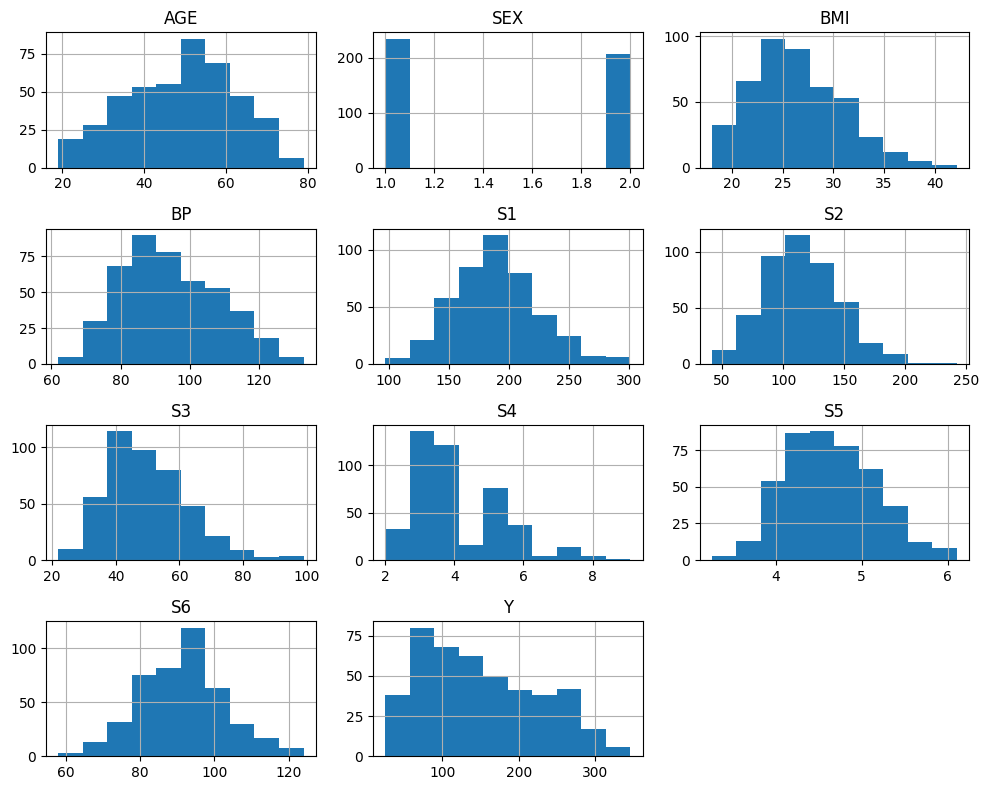

In [7]:
# Histogram
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(10,8))
plt.tight_layout()
plt.show()

# **4. Data Cleaning**
* Missing Values Handling
* Check Duplicated Data
* Outlier Analysis

## Missing Values Handling

In [8]:
# Check Missing Values
print("Total missing values", df.isnull().sum().sum())
print(df.isnull().sum())

Total missing values 0
AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64


## Check Duplicated Data

In [9]:
# Check Duplicated Data
print("Total Duplicated Data :", df.duplicated().sum())

Total Duplicated Data : 0


## Outlier Analysis

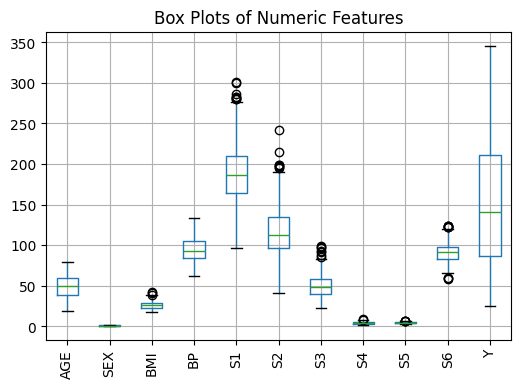

In [10]:
# Box plot to detect outliers on numerical variables

plt.figure(figsize=(6, 4))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

There is outliers on BMI, S1, S6 and Y

## Remove Outliers

In [11]:
# # Remove Outliers
# def remove_outliers_iqr(df):
#     Q1 = df.quantile(0.25)  # Kuartil pertama (25%)
#     Q3 = df.quantile(0.75)  # Kuartil ketiga (75%)
#     IQR = Q3 - Q1  # Rentang interkuartil

#     # Menentukan batas bawah dan atas
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Menghapus baris yang memiliki outlier pada kolom mana pun
#     df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

#     return df_cleaned

# # Examples of use in data frames
# df_cleaned = remove_outliers_iqr(df)

# print(f"Amount of data before cleaning the outlier: {len(df)}")
# print(f"Amount of data after cleaning the outlier: {len(df_cleaned)}")


# **5. Correlation Heatmap**

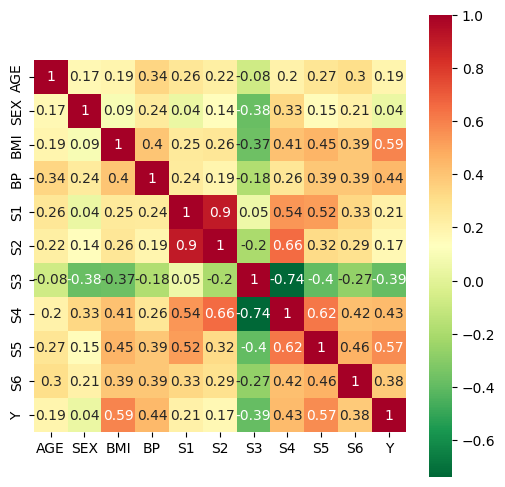

In [12]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize = (6,6))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

In [13]:
# Display Strongest Correlation With Target (Y)
correlation_with_Y = correlation["Y"].sort_values(key=abs, ascending=False)
print("Correlation With Target (Y):")
print(correlation_with_Y)

Correlation With Target (Y):
Y      1.000000
BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S3    -0.394789
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
Name: Y, dtype: float64


## Selected Column

In [14]:
#Selected Column Strongest Corelation with Target(Y)
data=["BMI", "S5", "BP"]
df_selected = df[data]
df_selected.head()

,BMI,S5,BP
0,32.1,4.8598,101.0
1,21.6,3.8918,87.0
2,30.5,4.6728,93.0
3,25.3,4.8903,84.0
4,23.0,4.2905,101.0


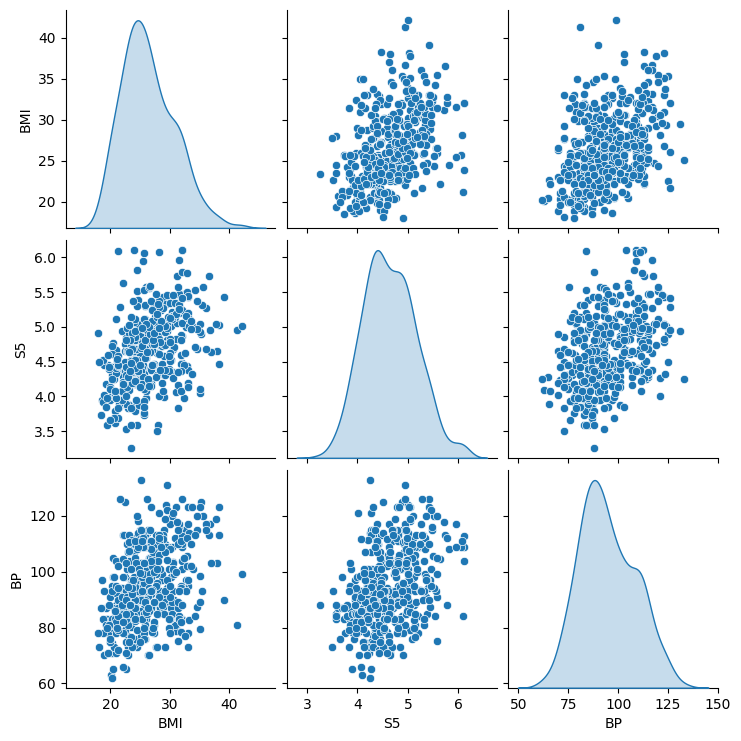

In [15]:
# Scatterplot between features and targets
sns.pairplot(df_selected, diag_kind="kde")
plt.show()

# **6. Linear Regression**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
# # Choosing Predictor & Target Variables
# X = df[['BMI','S5','BP']]  # Variabel independen
# y = df['Y']  # Variabel dependen (target)

# # Dividing Data into Training and Testing (80%-20%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# # Creating and Training a Linear Regression Model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Predictions on Test Data
# y_pred = model.predict(X_test)

# **7. Evaluation**

In [19]:
# from sklearn.metrics import r2_score, mean_squared_error

# # Model Evaluation
# r2 = r2_score(y_test, y_pred)  # R-squared Score
# mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error

# print(f"R² Score: {r2:.4f}")
# print(f"Mean Squared Error: {mse:.4f}")

# **8. Regression for 2 Variable**

## **BMI**

In [20]:
#Split Data

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [21]:
# Create
regr = LinearRegression()
train_x = np.asanyarray(train[['BMI']])
train_y = np.asanyarray(train[['Y']])
regr.fit (train_x, train_y)

# Model Coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.72277779]]
Intercept:  [-106.5273741]


Text(0, 0.5, 'Disease Progression')

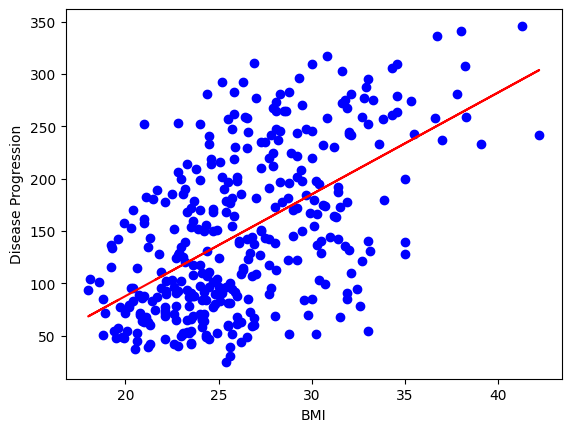

In [22]:
# Plot of regression results

plt.scatter(train.BMI, train.Y,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("BMI")
plt.ylabel("Disease Progression")

In [23]:
# Calculate errors

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["BMI"]])
test_y = np.asanyarray(test[["Y"]])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )


Mean absolute error: 46.88
Residual sum of squares (MSE): 3315.23
R2-score: -0.98


## **S5 (log of serum triglycerides level)**

In [24]:
# Create a regression model
regr = LinearRegression()
train_x = np.asanyarray(train[['S5']])
train_y = np.asanyarray(train[['Y']])
regr.fit (train_x, train_y)

# Model Coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[87.87315956]]
Intercept:  [-256.83321086]


Text(0, 0.5, 'Disease Progression')

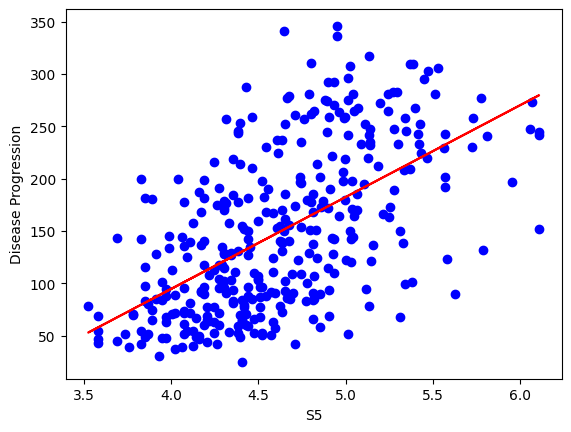

In [25]:
# Plot of regression results

plt.scatter(train.S5, train.Y,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("S5")
plt.ylabel("Disease Progression")

In [26]:
# Calculate Error

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["S5"]])
test_y = np.asanyarray(test[["Y"]])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )


Mean absolute error: 53.31
Residual sum of squares (MSE): 4600.54
R2-score: -0.95


#**ADD**

In [27]:
# # Visualization of Prediction Results vs Actual Value
# plt.figure(figsize=(8,6))
# sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Garis y=x sebagai referensi
# plt.xlabel("Actual Diabetes Progression")
# plt.ylabel("Predicted Diabetes Progression")
# plt.title("Actual vs Predicted Values")
# plt.show()